# Problem 2

## Pen/Paper derivation

For this assignment, I slightly deviated from the lecture notes in favor of a separate site. The fourier series I used is defined below.

We assume here that for a function that we want, $f(x)$,

$ f(x) = a_0 + \sum_{n=1}^{\infty}{a_ncos(\frac{nx\pi}{L})} + \sum_{n=1}^{\infty}{b_nsin(\frac{nx\pi}{L})} $

where $ L $ is half the period of the function.

We say $a_0 = \frac{1}{2L}\int_{-L}^{L}{f(x)dx},\; a_n = \frac{1}{L}\int_{-L}^{L}{f(x) cos(\frac{n\pi x}{L})dx},\;b_n = \frac{1}{L}\int_{-L}^{L}{f(x) sin(\frac{n\pi x}{L})dx} $

To derive the coefficients, we start with $L = 1$ since the period is $2$.

As defined in the problem, $f(x) = \sqrt{\frac{1}{4} - x^2}$ for $|x| \leq \frac{1}{4}$ and $0$ otherwise.

Since the function is symmetric about the origin, the $b_n$ terms are irrelevant, and we can focus on the coefficients to the cosine terms.

Thus, $a_0 = \frac{1}{2L}\int_{-L}^{L}{f(x)dx} = \frac{1}{2(1)}\int_{-1/2}^{1/2}{\sqrt{\frac{1}{4} - x^2} dx} = \frac{x}{2}\sqrt{\frac{1}{4} - x^2} + \frac{1}{8}sin^{-1}(2x)$
$= \frac{1}{8}(sin^{-1}(1) - sin^{-1}(-1)) = \frac{\pi}{8}$

n.b. we used bounds $[-\frac{1}{2}, \frac{1}{2}]$ instead of $[-1, 1]$ since the function is 0 at all other points.

Similarly, $a_n = \frac{1}{L}\int_{-L}^{L}{f(x) cos(\frac{n\pi x}{L}) dx} = \frac{1}{(1)}\int_{-1/2}^{1/2}{\sqrt{\frac{1}{4} - x^2} cos(\frac{n\pi x}{(1)}) dx} = \int_{-1/2}^{1/2}{\sqrt{\frac{1}{4} - x^2} cos(n\pi x) dx} = \frac{J_1(\frac{n\pi}{2})}{2n}$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, pi, sqrt
import scipy.special as sp


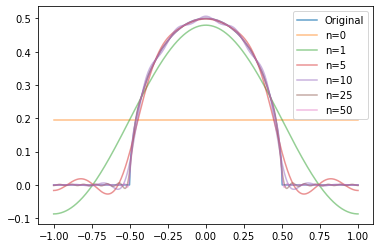

In [11]:
def fourier(x, n=50):
    a0 = np.pi / 8 / 2
    a_n = lambda n: sp.jv(1, n*np.pi / 2) / (2 * n)
    for i in range(1, n + 1):
        coeff = a_n(i) * cos(i * x * pi)
        a0 += coeff
    return a0

x_axis = np.linspace(-1, 1, 1000)

# Generic function to apply a function to every element in numpy array
apply = lambda f: np.array([f(x) for x in x_axis])

L = 1
# Base function with default to 0 with inner function slightly modified to preserve floating point stability
f = lambda x: sqrt((1 - 4 * x * x) / 4) if abs(x) <= .5 else 0

plt.plot(x_axis, apply(f), label='Original', alpha=.7)

# Keep track of RMS values as we calculate Fourier terms
err = []

# N values we want to keep track of
ns = [0, 1, 5, 10, 25, 50]
verbose = True

for n in ns:
    y = apply(lambda x: fourier(x, n))
    plt.plot(x_axis, y, label=f'n={n}', alpha=.5)
    # Log RMS error
    err.append(sqrt(np.sum((y - apply(f))**2) / y.shape[0]))

plt.legend()

#%

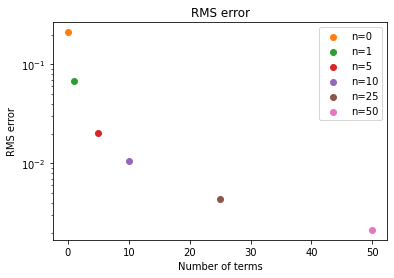

In [12]:
plt.scatter(0, 0, alpha=0)
for n, e in zip(ns, err):
    plt.scatter(n, e, label=f'n={n}')
plt.legend()
plt.title("RMS error")
plt.xlabel("Number of terms")
plt.ylabel("RMS error")
plt.yscale('log')

